# **Auction Hunters**
## Exploratory Data Analysis Project
## Part 2: Exploratory Data Analysis
#### Joshua Higgins | October 2023 ~

## ❓ Did you see Part 1 - Data Pre-processing❓
* If you didn't see how I got here, check out the link below to the data collection, cleaning and verification (pre-processing) notebook.
   * You can find that here: [Part 1: Pre-processing!](https://github.com/Joshua-Higgins-jp/Auction_Hunters_EDA/blob/master/auction_hunters_preprocessing.ipynb)

## Objectives
* Import the cleaned data
* Perform a simple EDA on the data
   * Ask Questions and Answer them with data :)
* BONUS!? Rating prediction based on ......

## Contents

1. AAA
2. BBB
3. CCC

# 1. Imports and Globals

In [149]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


In [24]:
DATA_DIR = "data"
MONETARY_COLS = ['paid_$', 'sold_$', 'profit_$']

## 1.1. Importing Cleaned Data

In [8]:
# Set Pandas display options so that we can see the entire dataframe.
pd.set_option('display.max_rows', None)     # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.width', None)        # Adjusts the display width

In [128]:
prepared_pickle = f"{DATA_DIR}/final_dataset_auction_hunters.pkl"
with open(prepared_pickle, 'rb') as file:
    df = pickle.load(file)

In [129]:
df.head(3)

,season_num,episode_num,unique_ep_ID,episode_name,location,air_date,description,paid_$,sold_$,profit_$,rating,votes,api_rating,api_votes,1,2,3,4,5,6,7,8,9,10
0,1,1,101,The Wild West,"San Bernardino, California",2010-11-09,Ton and Allen head to auctions in the desert t...,376,1190,814,7.8,34.0,7.56,55.0,1.0,0.0,0.0,1.0,1.0,10.0,14.0,13.0,6.0,9.0
1,1,2,102,The Big Score,"Downtown Los Angeles, California",2010-11-09,Ton and Allen bid on units in downtown LA and ...,2025,5850,3825,6.5,26.0,7.18,44.0,1.0,0.0,0.0,1.0,1.0,10.0,15.0,8.0,3.0,5.0
2,1,3,103,Ton's Got a Gun,"Mission Hills, California",2010-11-16,Allen encounters some old rivals in the Valley...,1900,9450,7550,6.8,20.0,7.69,39.0,0.0,0.0,0.0,0.0,1.0,6.0,13.0,10.0,2.0,7.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season_num    107 non-null    int8          
 1   episode_num   107 non-null    int8          
 2   unique_ep_ID  107 non-null    int16         
 3   episode_name  107 non-null    object        
 4   location      107 non-null    object        
 5   air_date      107 non-null    datetime64[ns]
 6   description   107 non-null    object        
 7   paid_$        107 non-null    int32         
 8   sold_$        107 non-null    int32         
 9   profit_$      107 non-null    int32         
 10  rating        75 non-null     float64       
 11  votes         75 non-null     float64       
 12  api_rating    105 non-null    float64       
 13  api_votes     105 non-null    float64       
 14  1             105 non-null    float64       
 15  2             105 non-null    float64   

# 2. Data Playground

## 2.1. Which Episodes Had the Min and Max Values for paid, sold and profit?

In [174]:
def min_or_max_feature_by_season(dataframe, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=False):
    """
    Pass in a dataframe, specify the most_feature column, prints text for the most_feature for each season.
    min_or_max is used to select which feature to select from each season.
    
    Dataframe contains columns: 
    ['season_num', 'episode_num', 'unique_ep_ID', 'episode_name', 'location', 
    'air_date', 'description', 'paid_$', 'sold_$', 'profit_$', 'rating',
    'votes', 'api_rating', 'api_votes', '1', '2', '3', '4', '5', '6', '7',
    '8', '9', '10']
    
    Unit is for monetary values $. If None, then no unit. Else, it will print the output sentence with your unit.
    
    Returns a dataframe of only the output values.
    """
    if min_or_max not in ["min", "max"]:
        raise ValueError("min_or_max argument must be 'min' or 'max'. Check input and try again.")
    
    feature_by_season_list_of_dicts = []
    
    df = dataframe
    season_num_list = df[season_col].unique()
    
    for season in season_num_list:
        season_df = df[df[season_col] == season]
        
        feature_id = season_df[feature_col].idxmax() if min_or_max == "max" else season_df[feature_col].idxmin()
        
        feature_ep_ID = season_df.loc[feature_id, 'unique_ep_ID']
        feature_episode_name = season_df.loc[feature_id, 'episode_name']
        feature_value = season_df.loc[feature_id, feature_col]
        #feature_location = season_df.loc[feature_id, 'location']
        
        ep_dict = {
            'season_num': season,
            'unique_ep_ID': feature_ep_ID,
            'episode_name': feature_episode_name,
            #'location': feature_location,
            feature_col: feature_value
        }
        
        if feature_col in monetary_cols:
            unit = '$'
        else:
            unit = None
        
        feature_by_season_list_of_dicts.append(ep_dict)
    
    result_df = pd.DataFrame.from_records(feature_by_season_list_of_dicts, index=['season_num'])
    
    if show_table is True:
        if min_or_max == "min": 
            print(f"\n💸 {min_or_max.capitalize()} {feature_col}:\n")
        if min_or_max == "max":
            print(f"\n🥇 {min_or_max.capitalize()} {feature_col}:\n")
        print(result_df)
        print("--------------------------------------------------------------")
        
    return result_df.reset_index() # this allows the season_num column to be accessed as a column later :)

In [175]:
max_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_profit_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='profit_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)

max_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_sold_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='sold_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)

max_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="max", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)
min_paid_ep_by_season_df = min_or_max_feature_by_season(dataframe=df, min_or_max="min", feature_col='paid_$', monetary_cols=MONETARY_COLS, season_col='season_num', show_table=True)


🥇 Max profit_$:

            unique_ep_ID            episode_name  profit_$
season_num                                                
1                    103         Ton's Got a Gun      7550
2                    223              Hot Wheels     20980
3                    305  Auction Hunter Shuffle     16670
4                    401      Once a Pawn a Time     17000
5                    506           Risk & Reward     61140
--------------------------------------------------------------

💸 Min profit_$:

            unique_ep_ID            episode_name  profit_$
season_num                                                
1                    101           The Wild West       814
2                    206  The Chicago Grand Slam      2855
3                    326         Gold ‘N’ Gloves      4568
4                    423    Cashville, Tennessee     -2425
5                    507         Blazing Saddles      1850
--------------------------------------------------------------

🥇 Max sold_

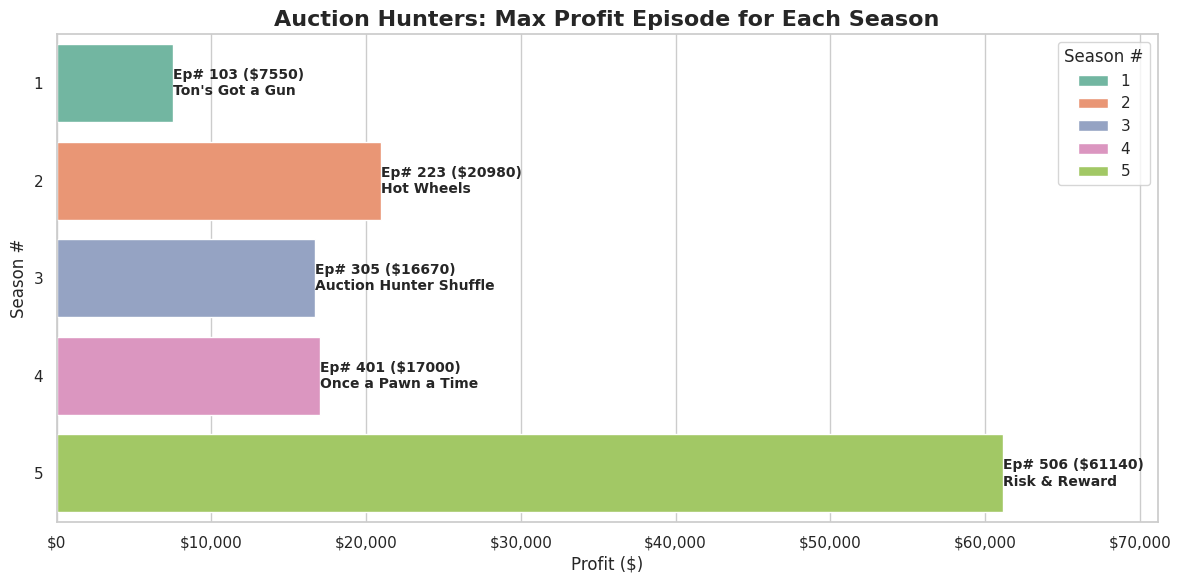

In [206]:
df = max_profit_ep_by_season_df
# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="profit_$", 
                 y="season_num", 
                 data=df, 
                 hue="season_num", 
                 dodge=False, 
                 orient='h',
                 palette="Set2")

# Add labels to the bars
for index, row in df.iterrows():
    plt.text(row['profit_$'], 
             index, 
             f"Ep# {row['unique_ep_ID']} (${row['profit_$']})\n{row['episode_name']}", 
             va='center', 
             weight='bold').set_fontsize(10)

plt.xlabel('Profit ($)')
plt.ylabel('Season #')
plt.title('Auction Hunters: Max Profit Episode for Each Season', weight='bold').set_fontsize(16)
plt.legend(title='Season #')

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.set_xlim(0, df['profit_$'].max() + 10000)


# plt.grid(True)  # Add grid lines to both x and y axes
plt.tight_layout()
plt.show()


## 2.2. Series Monetary plots for paid, sold and profit:

In [172]:
def show_basic_feature_plot(dataframe, feature_col):
    """
    Takes a dataframe with 'season_num', 'unique_ep_ID' and other monetary values and plots them, index vs. feature_col.
    """
    df = dataframe

    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(data=df, x=df.index, y=feature_col, hue='season_num', palette='Set1')

    # Initialize a counter to keep track of the episode index across seasons
    episode_counter = 0

    # Annotate the line with unique_ep_ID
    for line in ax.lines:
        x_data = line.get_xdata()
        y_data = line.get_ydata()
        for x, y in zip(x_data, y_data):
            unique_ep_ID = df.loc[episode_counter, 'unique_ep_ID']
            ax.annotate(f'{unique_ep_ID}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=6)
            episode_counter += 1  # Increment the episode counter

    plt.xlabel('Episode Index (Number)', weight='bold')
    plt.ylabel(f"{feature_col}", weight='bold')
    plt.title(f"{feature_col} vs. Episode Index with Unique Episode ID Annotations", weight='bold', fontsize=16)
    plt.legend(title='Season')

    # Add more gridlines
    ax.set_xticks(range(0, len(df), 10))

    # Format y-axis labels with comma separator
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

    plt.grid(True)  # Add grid lines to both x and y axes
    plt.tight_layout()
    plt.show()

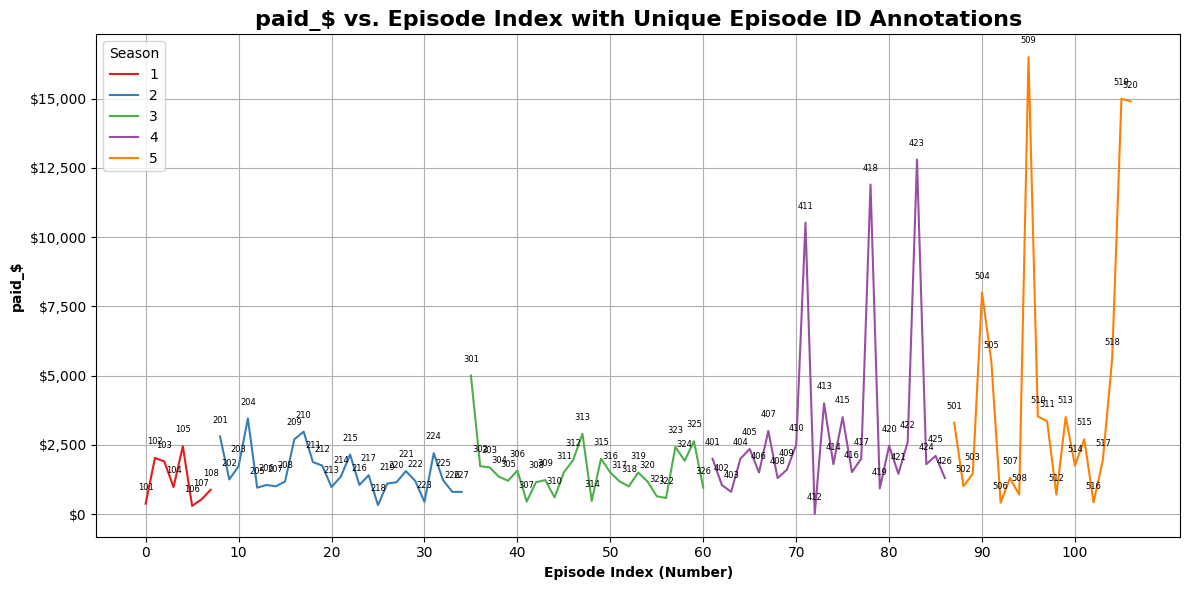

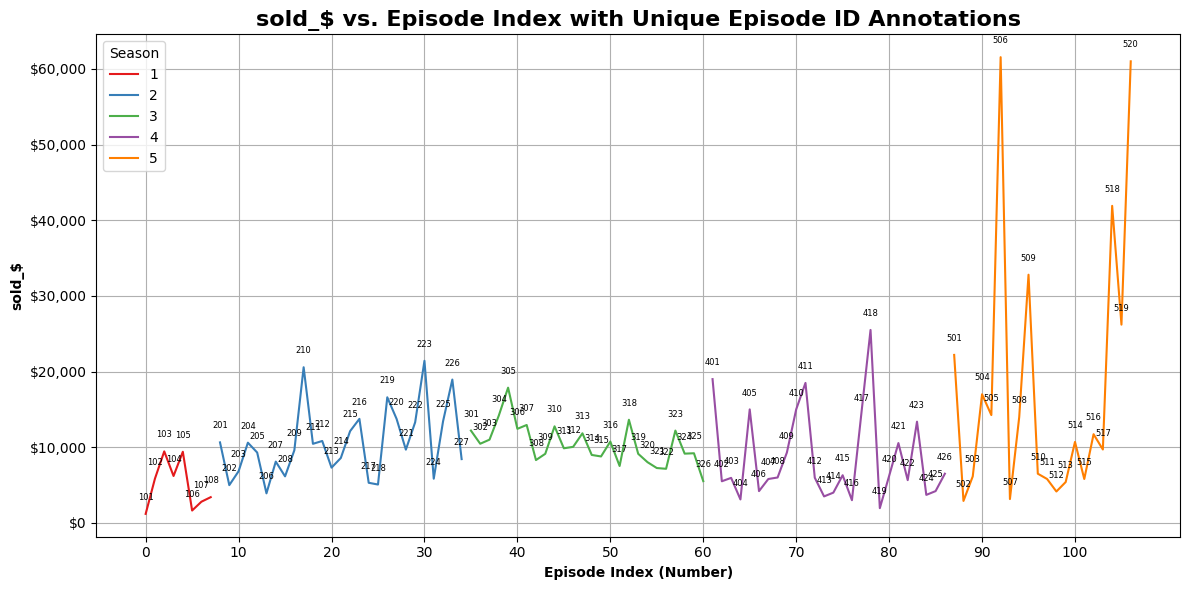

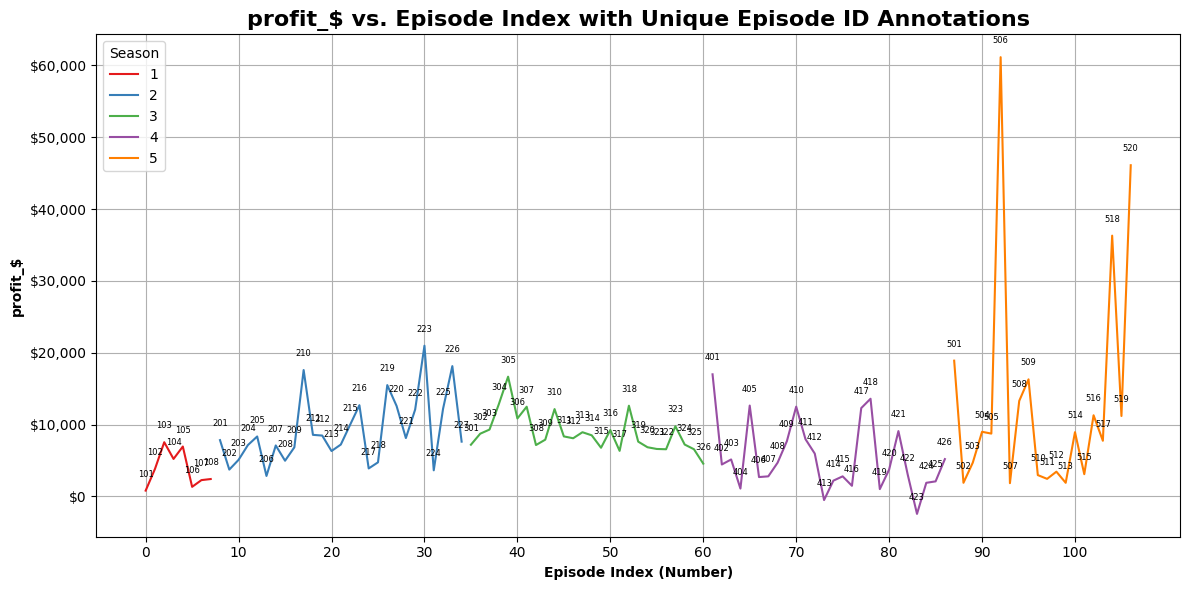

In [173]:
list_of_features_to_plot = ['paid_$', 'sold_$', 'profit_$']
for feature in list_of_features_to_plot:
    show_basic_feature_plot(df, feature)